In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from math import *
from matplotlib.colors import Normalize

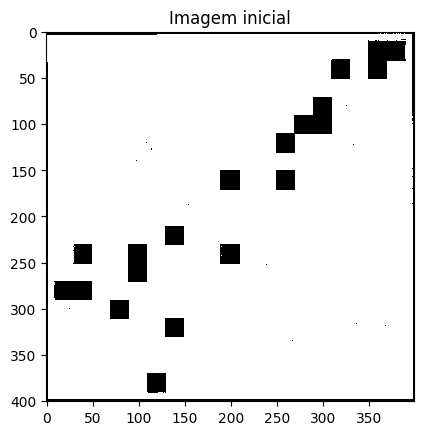

In [31]:
pgmf = open('my_map.pgm', 'rb')
image = plt.imread(pgmf)

image_copia = 1.0 * (image > 250)

goal = (80, 325) 
robo = (300, 25) 

image_copia[goal[0]][goal[1]] = 0 
image_copia[robo[0]][robo[1]] = 0   

fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 1')

plt.imshow(image_copia, interpolation='nearest', cmap='gray')
plt.title('Imagem inicial')
plt.show()

In [32]:
obstaculos = np.argwhere(image_copia == 0) #saber onde tem obstacúlos
coordenadas = list()
ft = 0
ka = 1
kr = 1000
p0 = 15

def forca_att(pos, goal):
    atrativa = (ka * ((math.dist(pos-goal))**2))/2
    return atrativa

def forca_rep(pos, obstaculos):
    p_q = math.dist(pos, obstaculos)
    if p_q > p0:
        return 0
    else:
        repulsiva = (kr*(((1/p_q)-(1/p0))**2))/2
    return repulsiva

In [33]:
print(obstaculos)

[[  0 314]
 [  0 315]
 [  0 316]
 ...
 [398 395]
 [398 396]
 [398 397]]


In [34]:
ponto = goal
parar = False
caminho = list()
vezes = 0

while(vezes <1000):
    vezes += 1
    for l in range (-1,2):
        for c in range (-1,2):
            print("entrou nos dois for")
            try:
                print("entrou no try")
                if(image_copia[ponto[0]+l][ponto[1]+c] == 1):
                    print("entrou no if")
                    fa = forca_att(([ponto[0]+l][ponto[1]+c]), goal)
                    fr= forca_rep(([ponto[0]+l][ponto[1]+c]), obstaculos)
                    ft = fa + fr

                    print(fa, fr, ft)

                    image_copia[ponto[0]+ l][ponto[1]+c]= ft
                    caminho.append(ft)
                    coordenadas.append([ponto[0]+ l, ponto[1]+c])

                if(ponto[0]+l == robo[0] and ponto[1]+c == robo[1]):
                    parar = True
                    break
            except: 
                continue
        if(parar == True):
            break   
    if(parar == True):
           break   
    
    ponto = coordenadas.pop(0)
    

entrou nos dois for
entrou no try
entrou nos dois for
entrou no try
entrou nos dois for
entrou no try
entrou nos dois for
entrou no try
entrou nos dois for
entrou no try
entrou no if
entrou nos dois for
entrou no try
entrou nos dois for
entrou no try
entrou nos dois for
entrou no try
entrou nos dois for
entrou no try


IndexError: pop from empty list

In [ ]:
mapa_forca = np.zeros(image_copia.shape)

for l in range(mapa_forca.shape[0]):
    
    for c in range(mapa_forca.shape[1]):
        posicao_atual = (l,c)
        print(posicao_atual)
        fa = forca_att(([l][c]), goal)
        fr = forca_rep(([l][c]), obstaculos)
        ft = fa + fr
        print(fa, fr, ft, posicao_atual)

        mapa_forca[l][c]= ft
        coordenadas.append([l][c])

In [5]:
print(obstaculos)
print(ft)

[[  0 314]
 [  0 315]
 [  0 316]
 ...
 [398 395]
 [398 396]
 [398 397]]
0


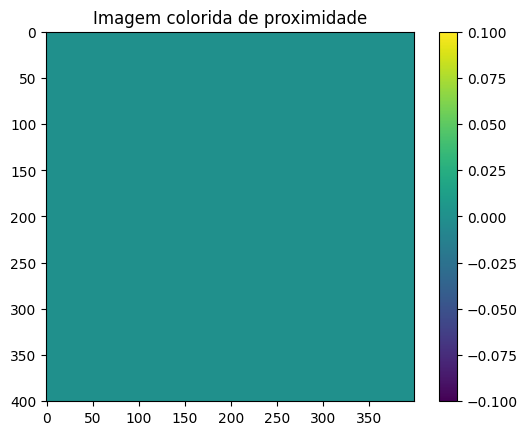

In [6]:
fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 2')

cmap= plt.get_cmap('viridis')

plt.imshow(mapa_forca, interpolation='nearest', cmap='viridis')  # Usando viridis para ver os valores
plt.colorbar()
plt.title('Imagem colorida de proximidade')
plt.show()